In [485]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from typing import List
from sklearn.model_selection import train_test_split


In [486]:
df = pd.read_csv('complete_houses_mod.csv')

def remove_outliers(df: pd.DataFrame, columns: List[str], n_std: int) -> pd.DataFrame:
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

df = remove_outliers(df, ['Living area'], 3)
df = remove_outliers(df, ['Surface of the land'], 3)
print(df['Living area'].max())
print(df['Surface of the land'].max())
df = remove_outliers(df, ['Living area'], 2)
df = remove_outliers(df, ['Surface of the land'], 2)
print(df['Living area'].max())
print(df['Surface of the land'].max())

Working on column: Living area
Working on column: Surface of the land
3410
16254
Working on column: Living area
Working on column: Surface of the land
492
3536


In [487]:
'''
'Living area'
'Number of rooms'
'Garden surface'
'Terrace surface'
'Open fire'
'Surface of the land'
'Number of facades'
'Swimming pool'
'Building Cond. values'
'Kitchen values'
'Primary energy consumption'
'Energy efficiency'
'''


"\n'Living area'\n'Number of rooms'\n'Garden surface'\n'Terrace surface'\n'Open fire'\n'Surface of the land'\n'Number of facades'\n'Swimming pool'\n'Building Cond. values'\n'Kitchen values'\n'Primary energy consumption'\n'Energy efficiency'\n"

In [488]:
features = list(df.drop(columns=['Zip','Price', 'id','Garden surface', 'Price of square meter','Primary energy consumption'
                                 ]).columns)

X = df[features].to_numpy()
y = df[['Price']].to_numpy().reshape(-1 , 1)

# Instantiate the scaler
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) 

# Normalize the training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lm = LinearRegression() 
lm.fit(X_train, y_train)

#normalize the whole dataset for scoring
X = scaler.transform(X)

score = lm.score(X_test, y_test)
coeff_df = pd.DataFrame(lm.coef_, columns=features)
coeff_df = coeff_df.T
coeff_df.columns = ['Coefficient']
predictions = lm.predict(X_test) 
coeff_df



,Coefficient
Unnamed: 0,-17271.381388
Living area,145546.779475
Number of rooms,24464.358897
Terrace surface,-518.235674
Open fire,9476.890460
Surface of the land,22830.419827
Number of facades,15329.090696
Swimming pool,15202.944270
Building Cond. values,40782.616939
Kitchen values,38708.590076


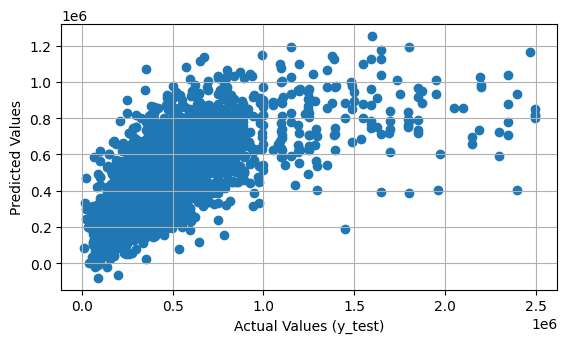

(5154, 11)
(8591, 11)
score:
0.4444272819332521
[432359.38824214]


In [489]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.axis('scaled')
plt.show()

print(X_train.shape)
print(X.shape)

print('score:')
print(score)
print(lm.intercept_)

(-114250.0, 2619250.0, -149703.20798139693, 1421546.7654027035)

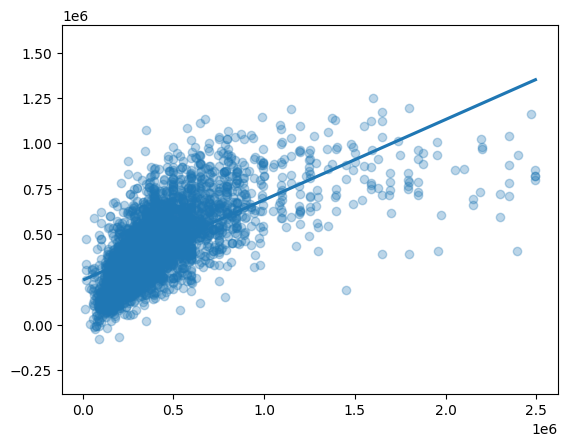

In [490]:
sns.regplot(x=y_test,y=predictions,ci=None,scatter_kws={'alpha': 0.3})
plt.axis('equal')

/tmp/ipykernel_347/1061164399.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50)


<Axes: ylabel='Density'>

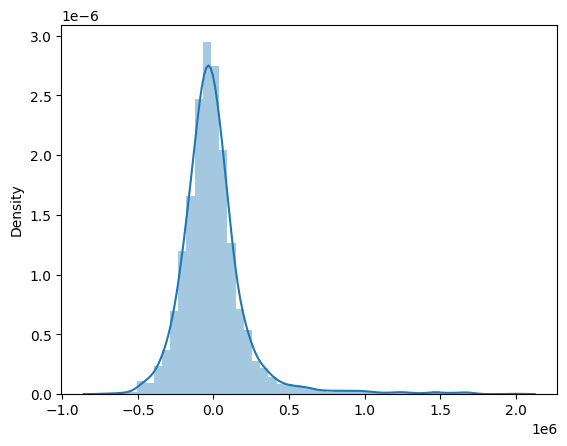

In [492]:
sns.distplot((y_test-predictions),bins=50)

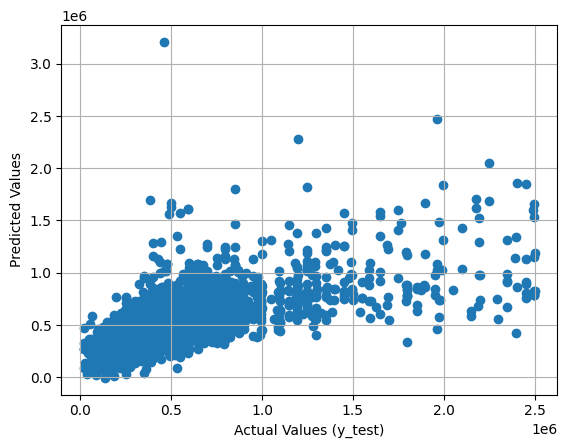

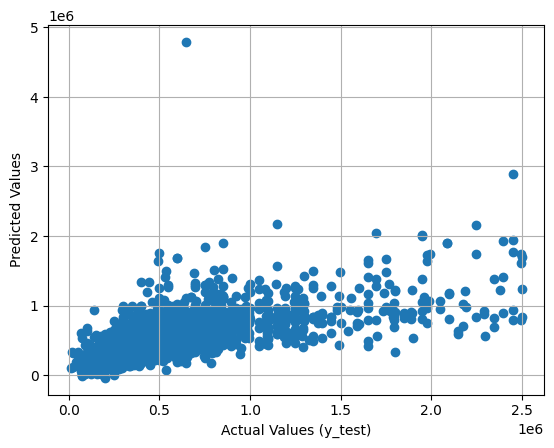